In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('science')

In [2]:
mats = pd.read_csv("in/tables/MATERIALS_FOR_CLASSIFICATION_CLEAN.csv")

In [3]:
cats = pd.read_csv("in/tables/MATERIAL_CATEGORY_FOR_CLASSIFICATION.csv")

In [4]:
cats = cats[cats.IS_MAIN == "t"].copy()
merge_cats = pd.merge(mats,cats,on=["MATERIAL_ODS_ID","SHOP"])

In [5]:
cats.CATEGORY_ID.unique().shape

(509,)

In [6]:
cats.CATEGORY_PATH.unique().shape

(647,)

In [7]:
cats = cats[~cats.duplicated("MATERIAL_ODS_ID")].copy()

In [8]:
merge = pd.merge(mats,cats,on=["MATERIAL_ODS_ID","SHOP"])

In [9]:
cats.CATEGORY_PATH.unique().shape

(635,)

In [10]:
merge["CATEGORY_LEVEL"] = [len(i) for i in merge.CATEGORY_PATH.str.split(" > ")]

In [11]:
plot_levels = merge.CATEGORY_LEVEL.value_counts().reset_index()
plot_levels = plot_levels.rename(columns={"CATEGORY_LEVEL":"count",
                                          "index":"CATEGORY_LEVEL"})

In [12]:
merge.query("CATEGORY_LEVEL in [3,4]").shape[0] / merge.shape[0]

0.9609764156788236

In [13]:
merge[merge.CATEGORY_PATH.str.contains("Dveře")].CATEGORY_PATH.unique()

array(['Hobby a zahrada > Dům, byt > Dveře > Dveřní, okenní kování',
       'Hobby a zahrada > Dům, byt > Dveře > Exteriérové dveře',
       'Hobby a zahrada > Dům, byt > Dveře > Interiérové dveře > Prosklené dveře > 90 cm, pravé',
       'Hobby a zahrada > Dům, byt > Dveře > Interiérové dveře > Posuvné dveře',
       'Hobby a zahrada > Dům, byt > Dveře > Interiérové dveře > Obložkové zárubně',
       'Hobby a zahrada > Dům, byt > Dveře > Interiérové dveře > Prosklené dveře > 80 cm, levé',
       'Hobby a zahrada > Dům, byt > Dveře > Interiérové dveře > Prosklené dveře > 70 cm, levé',
       'Hobby a zahrada > Dům, byt > Dveře > Interiérové dveře > Plné dveře > 80 cm, levé',
       'Hobby a zahrada > Dům, byt > Dveře > Interiérové dveře > Prosklené dveře > 60 cm, pravé',
       'Hobby a zahrada > Dům, byt > Dveře > Interiérové dveře > Prosklené dveře > 70 cm, pravé',
       'Hobby a zahrada > Dům, byt > Dveře > Interiérové dveře > Plné dveře > 70 cm, levé',
       'Hobby a zahrada > Dů

In [14]:
pip install scienceplots

Note: you may need to restart the kernel to use updated packages.


In [47]:
plot_levels.to_csv("plot_levels.csv",index=False)

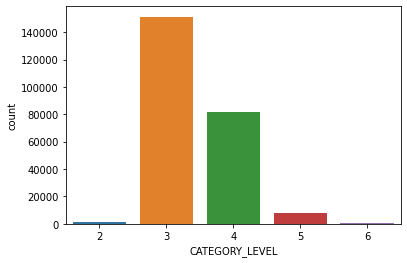

In [15]:

sns.barplot(data=plot_levels, x="CATEGORY_LEVEL",y="count")
plt.savefig("levels_freq.pdf",bbox_inches='tight')

In [16]:
largest_categories = merge.CATEGORY_PATH.value_counts().head(10).reset_index().copy()
largest_categories = largest_categories.rename(columns={"CATEGORY_PATH":"count","index":"CATEGORY_PATH"})

In [17]:
category_paths = merge[~merge.duplicated("CATEGORY_PATH")][["CATEGORY_PATH","CATEGORY_LEVEL"]]

In [18]:
plot_largest = pd.merge(largest_categories,category_paths,on="CATEGORY_PATH")

In [19]:
plot_largest.CATEGORY_PATH = plot_largest.CATEGORY_PATH.apply(lambda x: " > ".join(x.split(" > ")[-2:]))

In [48]:
plot_largest.to_csv("plot_largest.csv",index=False)

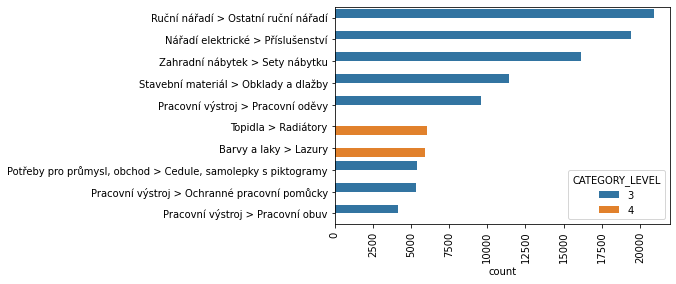

In [20]:
sns.barplot(data=plot_largest, hue="CATEGORY_LEVEL",y="CATEGORY_PATH",x="count")
plt.xticks(rotation=90);
plt.ylabel("")
plt.savefig("largest_categories.pdf",bbox_inches='tight')

In [21]:
plot_mat_counts = merge_cats.MATERIAL_ID.value_counts().reset_index()

In [49]:
plot_mat_counts.to_csv("plot_mat_counts.csv",index=False)

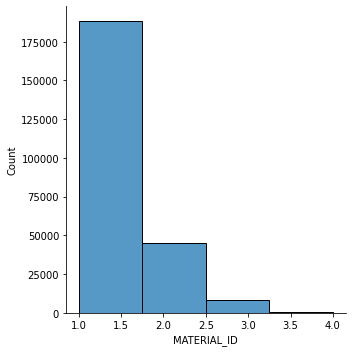

In [70]:

sns.displot(data=plot_mat_counts,x="MATERIAL_ID", bins=4,)

In [23]:
merge.query("CATEGORY_NAME == 'Houpací sítě'")

,MATERIAL_ID,MATERIAL_ODS_ID,SHOP,NAME,BRIEF,NAME_BRIEF,NAME_DESCRIPTION,NAME_BRIEF_DESCRIPTION,IS_MAIN,CATEGORY_ID,CATEGORY_PATH,CATEGORY_URL,VISIBLE,CATEGORY_NAME,CATEGORY_LEVEL
2895,100011299113,465634732,MACZ,"JUNIOR, šedá",Závěsné houpadlo pro děti od 3let.\n,junior šed ; závěsn houpadl dít,junior šed ; hojdavak junior závěsn textiln ho...,junior šed závěsn houpadl dít hojdavak junior ...,t,80,Hobby a zahrada > Zahradní nábytek > Zahradní ...,https://www.mall.cz/houpaci-site,t,Houpací sítě,4
3134,1359260,8858132,MACZ,Plachta proti slunci a dešti ClassicFly - forest,Plachta ochrání před přímým sluncem i před pru...,placht slunc deštit classicfl forest ; placht ...,placht slunc deštit classicfl forest ; siest p...,placht slunc deštit classicfl forest placht oc...,t,80,Hobby a zahrada > Zahradní nábytek > Zahradní ...,https://www.mall.cz/houpaci-site,t,Houpací sítě,4
3714,100064594614,2460918169,MACZ,hamaka DC-C09 pro 2 osoby s nafukovacími lemy ...,"Lehká, skladná a velmi pohodlná hamaka pro 2 o...",hamak osob nafukovac lem tmav šed ; lehk sklad...,hamak osob nafukovac lem tmav šed ; lehk sklad...,hamak osob nafukovac lem tmav šed lehk skladn ...,t,80,Hobby a zahrada > Zahradní nábytek > Houpací sítě,https://www.mall.cz/houpaci-site,t,Houpací sítě,3
8186,100066837328,2502910020,MACZ,"Tempo Kondela Závěsné houpací křeslo, červená,...",Materiál: 100% polyester/oceľ Provedení: červe...,temp kondel závěsn houpac křesl červen klor ne...,temp kondel závěsn houpac křesl červen klor ne...,temp kondel závěsn houpac křesl červen klor ne...,t,80,Hobby a zahrada > Zahradní nábytek > Houpací sítě,https://www.mall.cz/houpaci-site,t,Houpací sítě,3
12322,100046648487,1911049318,MACZ,Houpací síť se stojanem FANTAL- bílá / smetanová,Zahradní síť včetně stojanu. Síť je vyrobena z...,houpac síť stojan fantal bíl smetan ; zahradn ...,houpac síť stojan fantal bíl smetan ; zahradn ...,houpac síť stojan fantal bíl smetan zahradn sí...,t,80,Hobby a zahrada > Zahradní nábytek > Zahradní ...,https://www.mall.cz/houpaci-site,t,Houpací sítě,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225947,100057475394,2325416461,MACZ,hamaka NC9004 modrá,Hamaka NILS Camp NC9004 o rozměru 195 × 150 cm...,hamak modr ; hamak nils camp rozměr dřevěn pří...,hamak modr ; hamak hupac síť nils camp ideáln ...,hamak modr hamak nils camp rozměr dřevěn příčk...,t,80,Hobby a zahrada > Zahradní nábytek > Houpací sítě,https://www.mall.cz/houpaci-site,t,Houpací sítě,3
231897,100055658128,2286524718,MACZ,"MAXIMUS INDOOR, bílá",KŘESLO PRO DOSPĚLÉ S NOSNOSTÍ 140 KG\n,maxim indoor bíl ; křesl dospěl nosnost,maxim indoor bíl ; hojdavak maxim závěsn texti...,maxim indoor bíl křesl dospěl nosnost hojdavak...,t,80,Hobby a zahrada > Zahradní nábytek > Zahradní ...,https://www.mall.cz/houpaci-site,t,Houpací sítě,4
231914,100058075196,2343103521,MACZ,Axin Trading Ratanové houpací křeslo Swivel bí...,Ratanové houpací křeslo je vyrobeno z přírodní...,axin trading ratan houpac křesl swivel bíl pol...,axin trading ratan houpac křesl swivel bíl pol...,axin trading ratan houpac křesl swivel bíl pol...,t,80,Hobby a zahrada > Zahradní nábytek > Zahradní ...,https://www.mall.cz/houpaci-site,t,Houpací sítě,4
235207,100002328308,9761299,MACZ,Látková houpací síť - duhová,Komfortní a prostorná houpací látková síť pro ...,látk houpac síť duhov ; komfortn prostorn houp...,látk houpac síť duhov ; vícebarevn houpac síť ...,látk houpac síť duhov komfortn prostorn houpac...,t,80,Hobby a zahrada > Zahradní nábytek > Houpací sítě,https://www.mall.cz/houpaci-site,t,Houpací sítě,3


In [24]:
mat = 449172002
merge_cats.query("MATERIAL_ID == @mat").CATEGORY_PATH.unique()

array(['Hobby a zahrada > Zahradní nábytek > Zahradní houpačky, houpací sítě > Houpací sítě',
       'Hobby a zahrada > Zahradní nábytek > Houpací sítě, křesla',
       'Hobby a zahrada > Zahradní nábytek > Houpací sítě , křesla',
       'Hobby a zahrada > Zahradní nábytek > Houpací sítě'], dtype=object)

In [25]:
mat = 100068911467
merge_cats.query("MATERIAL_ID == @mat").CATEGORY_PATH.unique()

array(['Hobby a zahrada > Zahradní nábytek > Houpací sítě , křesla > Příslušenství',
       'Hobby a zahrada > Zahradní nábytek > Houpací sítě, křesla > Příslušenství',
       'Hobby a zahrada > Zahradní nábytek > Zahradní houpačky, houpací sítě > Houpací sítě > Příslušenství',
       'Hobby a zahrada > Zahradní nábytek > Houpací sítě > Příslušenství'],
      dtype=object)

In [26]:
materials = plot_mat_counts.query("MATERIAL_ID==4")["index"].values
merge_cats.query("MATERIAL_ID in @materials").CATEGORY_PATH.unique()

array(['Hobby a zahrada > Nářadí elektrické > Elektrické šroubováky > Akumulátorové rázové utahováky',
       'Hobby a zahrada > Nářadí elektrické > Rázová utahováky > Akumulátorové',
       'Hobby a zahrada > Nářadí elektrické > Elektrické šroubováky > Akumulátorové',
       'Hobby a zahrada > Nářadí elektrické > Rázové utahováky > Akumulátorové',
       'Hobby a zahrada > Zahradní nábytek > Houpací sítě , křesla > Příslušenství',
       'Hobby a zahrada > Zahradní nábytek > Zahradní houpačky, houpací sítě > Houpací sítě > Příslušenství',
       'Hobby a zahrada > Zahradní nábytek > Houpací sítě, křesla > Příslušenství',
       'Hobby a zahrada > Zahradní nábytek > Houpací sítě > Příslušenství',
       'Hobby a zahrada > Zahradní nábytek > Zahradní houpačky, houpací sítě > Houpací sítě',
       'Hobby a zahrada > Zahradní nábytek > Houpací sítě , křesla',
       'Hobby a zahrada > Zahradní nábytek > Houpací sítě, křesla',
       'Hobby a zahrada > Zahradní nábytek > Houpací sítě'], dt

In [27]:
materials = plot_mat_counts.query("MATERIAL_ID==3")["index"].values
print(merge_cats.query("MATERIAL_ID in @materials").CATEGORY_ID.unique().shape[0])
merge_cats.query("MATERIAL_ID in @materials").CATEGORY_PATH.unique()

17


array(['Hobby a zahrada > Bazény, vířivky > Bazény',
       'Hobby a zahrada > Bazény > Bazény',
       'Hobby a zahrada > Bazény, příslušenství > Bazény',
       'Hobby a zahrada > Zahradní nábytek > Stany, altany',
       'Hobby a zahrada > Stavby na zahradě > Domky, altány > Altány',
       'Hobby a zahrada > Zahradní nábytek > Slunečníky, zastínění > Stany, altany',
       'Hobby a zahrada > Dům, byt > Koupelna a sanitární technika > Umyvadla',
       'Hobby a zahrada > Dům, byt > Koupelna, sanitarni technika > Vany, sprchy > Umyvadla',
       'Hobby a zahrada > Dům, byt > Koupelna, sanitarni technika > Umyvadla',
       'Hobby a zahrada > Zahradní nábytek > Zahradní houpačky, houpací sítě > Závěsná křesla',
       'Hobby a zahrada > Zahradní nábytek > Závěsná křesla',
       'Hobby a zahrada > Zahradní nábytek > Houpací, závěsná křesla',
       'Hobby a zahrada > Bazény > Bazénová chemie',
       'Hobby a zahrada > Bazény, příslušenství > Bazénová chemie',
       'Hobby a zahrada 

In [28]:
plot_mat_counts.query("MATERIAL_ID==2")

,index,MATERIAL_ID
8796,100066718148,2
8797,100042693782,2
8798,100064006406,2
8799,100066016826,2
8800,100039824584,2
...,...,...
53703,100052716211,2
53704,100044765581,2
53705,3176582,2
53706,100041390422,2


In [29]:
mat = 100051869971
merge_cats.query("MATERIAL_ID == @mat").CATEGORY_PATH.unique()

array(['Hobby a zahrada > Dům, byt > Koupelna a sanitární technika > Vodovodní baterie',
       'Hobby a zahrada > Dům, byt > Koupelna, sanitarni technika > Vodovodní baterie'],
      dtype=object)

In [30]:
mat = 100041469886
merge_cats.query("MATERIAL_ID == @mat").CATEGORY_PATH.unique()

array(['Hobby a zahrada > Dům, byt > Dveřní, okenní kování',
       'Hobby a zahrada > Dům, byt > Dveře > Dveřní, okenní kování'],
      dtype=object)

In [31]:
plot_counts = merge.CATEGORY_ID.value_counts().reset_index()


In [32]:
plot_counts.CATEGORY_ID.median()

82.0

In [33]:
plot_counts.CATEGORY_ID.quantile([0.25,0.75])

0.25     15.0
0.75    282.0
Name: CATEGORY_ID, dtype: float64

In [71]:
plot_counts.to_csv("plot_counts.csv",index=False)

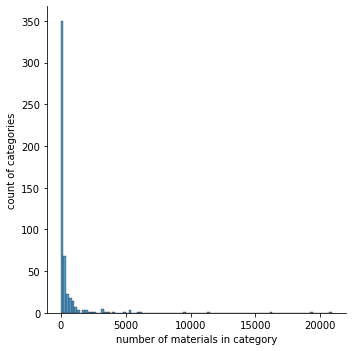

In [34]:
sns.displot(data=plot_counts,x="CATEGORY_ID", bins=100)
plt.xlabel("number of materials in category");
plt.ylabel("count of categories");

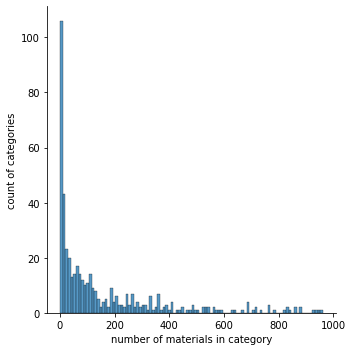

In [35]:
sns.displot(data=plot_counts.query("CATEGORY_ID <1000"),x="CATEGORY_ID", bins=100)
plt.xlabel("number of materials in category");
plt.ylabel("count of categories");

In [36]:
merge["NAME_LEN"] = merge.NAME.str.len()

In [37]:
merge[merge.NAME_LEN>7000]

,MATERIAL_ID,MATERIAL_ODS_ID,SHOP,NAME,BRIEF,NAME_BRIEF,NAME_DESCRIPTION,NAME_BRIEF_DESCRIPTION,IS_MAIN,CATEGORY_ID,CATEGORY_PATH,CATEGORY_URL,VISIBLE,CATEGORY_NAME,CATEGORY_LEVEL,NAME_LEN


In [38]:
plot_title_char_freq = merge.NAME.str.len().value_counts().reset_index()
plot_title_char_freq = plot_title_char_freq.rename(columns={"NAME":"count",
                                          "index":"number of characters in TITLE"})

In [39]:
plot_title_word_freq = merge.NAME.str.split().apply(lambda x: len(x)).value_counts().reset_index()
plot_title_word_freq = plot_title_word_freq.rename(columns={"NAME":"count",
                                          "index":"number of words in TITLE"})

In [40]:
merge.NAME.str.len().mean()

49.697121143281976

In [72]:
plot_title_char_freq.to_csv("plot_title_char_freq.csv",index=False)

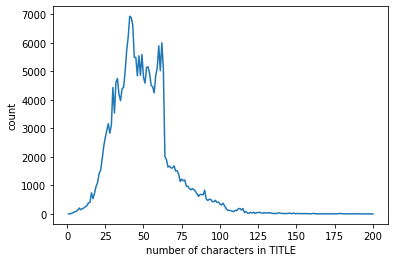

In [41]:
sns.lineplot(data=plot_title_char_freq,y="count",x="number of characters in TITLE")
plt.savefig("char_title.pdf",bbox_inches='tight')

In [73]:
plot_title_word_freq.to_csv("plot_title_word_freq.csv",index=False)

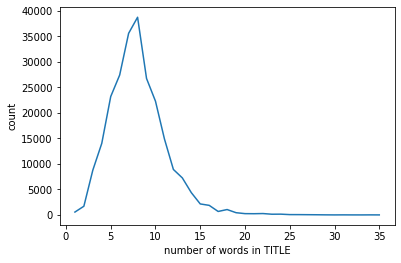

In [42]:
sns.lineplot(data=plot_title_word_freq,y="count",x="number of words in TITLE")
plt.savefig("word_title.pdf",bbox_inches='tight')

In [93]:
merge[merge.BRIEF.str.len() > 600]

,MATERIAL_ID,MATERIAL_ODS_ID,SHOP,NAME,BRIEF,NAME_BRIEF,NAME_DESCRIPTION,NAME_BRIEF_DESCRIPTION,IS_MAIN,CATEGORY_ID,CATEGORY_PATH,CATEGORY_URL,VISIBLE,CATEGORY_NAME,CATEGORY_LEVEL,NAME_LEN,DESCRIPTION
133697,472325,6533380,MACZ,"Sonix, bezdrátový GSM alarm ALM301",Kompaktní bezdrátový zabezpečovací GSM alarm E...,sonix bezdrát gsm alarm ; kompaktn bezdrát zab...,sonix bezdrát gsm alarm ; evolve helpdesk tech...,sonix bezdrát gsm alarm kompaktn bezdrát zabez...,t,17808,"Hobby a zahrada > Dům, byt > Alarmy",https://www.mall.cz/alarmy-dum,t,Alarmy do domu,3,34,evolve helpdesk technick podpor vyskytnout pro...


In [43]:
plot_brief_char_freq = merge.BRIEF.str.len().value_counts().reset_index()
plot_brief_char_freq = plot_brief_char_freq.rename(columns={"BRIEF":"count",
                                          "index":"number of characters in BRIEF"})

In [74]:
plot_brief_char_freq.to_csv("plot_brief_char_freq.csv",index=False)

In [89]:
plot_brief_char_freq["number of characters in BRIEF"].max()

665.0

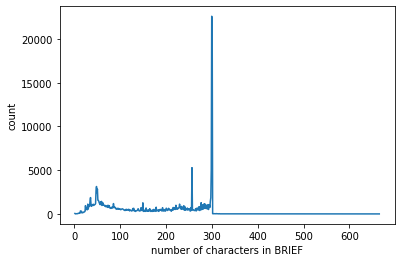

In [44]:
sns.lineplot(data=plot_brief_char_freq,y="count",x="number of characters in BRIEF")
plt.savefig("char_brief.pdf",bbox_inches='tight')

In [78]:
merge["DESCRIPTION"] = merge.NAME_DESCRIPTION.apply(lambda x: x.split(" ; ")[-1])

In [85]:
plot_desc_char_freq = merge.DESCRIPTION.str.len().value_counts().reset_index()
plot_desc_char_freq = plot_desc_char_freq.rename(columns={"DESCRIPTION":"count",
                                          "index":"number of characters in DESCRIPTION"})

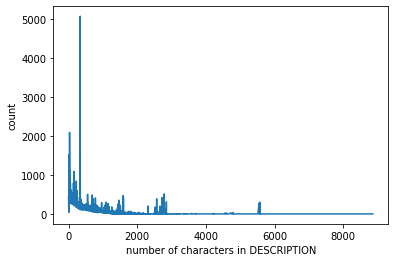

In [86]:
sns.lineplot(data=plot_desc_char_freq,y="count",x="number of characters in DESCRIPTION")
plt.savefig("char_brief.pdf",bbox_inches='tight')

In [94]:
plot_desc_char_freq.to_csv("plot_desc_char_freq.csv",index=False)

In [88]:
plot_desc_char_freq["number of characters in DESCRIPTION"].max()

8864

# tree

In [45]:
pip install etetoolkit ete3 ete_toolchain

ERROR: Could not find a version that satisfies the requirement etetoolkit (from versions: none)
ERROR: No matching distribution found for etetoolkit
Note: you may need to restart the kernel to use updated packages.


In [46]:
from ete3 import Tree
t = Tree( "((a,b),c);" )
t.show()

ModuleNotFoundError: No module named 'ete3'